In [71]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.circuit.library import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
import numpy as np
np.set_printoptions(suppress=True)

## Flipping a qubit.

Input: A qubit in the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

Goal: A qubit in the state $|\psi'\rangle = |\alpha |1\rangle + \beta |0\rangle$.

Solution: The $X$ gate flips a qubit from $|0\rangle$ to $|1\rangle$ and vice-versa.

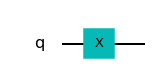

In [50]:
circ = QuantumCircuit(1)
circ.x(0)
circ.draw("mpl")

To see if this gate actually flips a qubit, we prepare a state $|\psi\rangle$ and then apply this gate to it.

In [51]:
rng = np.random.default_rng()

alpha, beta = rng.random((2,))
norm = np.sqrt(alpha**2 + beta**2)
alpha, beta = alpha / norm, beta / norm

psi = Statevector([alpha, beta])
psip = psi.evolve(circ)

print(f"|psi>: {psi.data}")
print(f"|psip>: {psip.data}")

|psi>: [0.9999+0.j 0.0109+0.j]
|psip>: [0.0109+0.j 0.9999+0.j]


## Basis change.

Input: A qubit in the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

Goal: If a qubit is in the state $|0\rangle$, change its state to $|+\rangle$. If it is in state $|1\rangle$, change its state to $|-\rangle$. If it is in a superposition state, change its state according to the effects on the basis vectors.

Solution: The Hadamard or $H$ gate does the job, $H|0\rangle = |+\rangle$, $H|1\rangle$. 

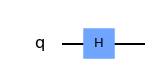

In [52]:
circ = QuantumCircuit(1)
circ.h(0)
circ.draw("mpl")

In [53]:
zero = Statevector([1, 0])
one = Statevector([0, 1])

plus = zero.evolve(circ)
minus = one.evolve(circ)
psih = psi.evolve(circ)

print(f"|+>: {plus.data}")
print(f"|->: {minus.data}")
print(f"|psih>: {psih.data}")

|+>: [0.7071+0.j 0.7071+0.j]
|->: [ 0.7071+0.j -0.7071+0.j]
|psih>: [0.7147+0.j 0.6994+0.j]


## Sign flip

Input: A qubit in the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

Output: A qubit in the state $|\psi'\rangle = \alpha |0\rangle - \beta |1\rangle$.

Solution: The $Z$ gate flips the sign of $|1\rangle$. It converts $|+\rangle$ to $|-\rangle$. The $Z$ gate acts in the same way in the $X$ basis as the $X$ gate in the $Z$ basis.

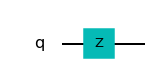

In [54]:
circ = QuantumCircuit(1)
circ.z(0)
circ.draw("mpl")

In [55]:
psi_sf = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_sf>: {psi_sf.data}")

|psi>: [0.9999+0.j 0.0109+0.j]


|psi_sf>: [ 0.9999+0.j -0.0109+0.j]


## Amplitude change

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, and an angle $\theta$ in radians.

Goal: If a qubit is in the state $|0\rangle$, change its state to $\cos\theta|0\rangle + \sin\theta|1\rangle$. If it is in state $|1\rangle$, change its state to $-\sin\theta|0\rangle + \cos\theta|1\rangle$. If it is in a superposition state, change its state according to the effects on the basis vectors. 

Solution: We have to use the $U_3(2\theta, 0, 0)$ gate. The matrix representation of this gate is $$\begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}.$$

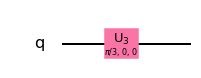

In [60]:
def amplitude_change(theta):
    circ = QuantumCircuit(1)
    circ.u3(2*theta, 0, 0, 0)
    return circ

theta = np.pi / 6
circ = amplitude_change(theta)
circ.draw("mpl")

In [62]:
psi_ac = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_ac>: {psi_ac.data}")

|psi>: [0.9999+0.j 0.0109+0.j]
|psi_ac>: [0.8605+0.j 0.5094+0.j]


## Phase flip

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.

Goal: Change the qubit state to $|\psi'\rangle = \alpha|0\rangle + i\beta|1\rangle$.

Solution: We can use the $U_1(\phi)$ gate for this, with $\phi = \pi/2$, whose matrix representation is $$\begin{bmatrix} = 1 & 0 \\ 0 & i \end{bmatrix}$$.

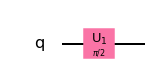

In [58]:
phi = np.pi / 2
circ = QuantumCircuit(1)
circ.u1(phi, 0)
circ.draw("mpl")

In [59]:
psi_pf = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_pf>: {psi_pf.data}")

|psi>: [0.9999+0.j 0.0109+0.j]
|psi_pf>: [0.9999+0.j     0.    +0.0109j]


## Phase change

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, and an angle $\theta$ in radians. 

Goal: If a qubit is in the state $|0\rangle$, don't change its state. If it is in state $|1\rangle$, change its state to $e^{i\theta}|1\rangle$. If it is in a superposition state, change its state according to the effects on the basis vectors. 

Solution: This is a generalization of the previous problem. The required gate is $U_1(\theta)$, whose matrix representation is $$\begin{bmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}.$$

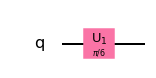

In [64]:
def phase_change(theta):
    circ = QuantumCircuit(1)
    circ.u1(theta, 0)
    return circ

theta = np.pi / 6
circ = phase_change(theta)
circ.draw("mpl")

In [66]:
psi_pc = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_pc>: {psi_pc.data}")

|psi>: [0.9999+0.j 0.0109+0.j]
|psi_pc>: [0.9999+0.j     0.0094+0.0054j]


## Global phase change

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.

Goal: Change state of qubit to $-\alpha|0\rangle - \beta|1\rangle$.

Solution: We can do this with the $R_\phi(2\pi)$ gate, which rotates the qubit by $\pi$ radians around the $z$-axis. Its matrix representation is $$\begin{bmatrix} e^{-i\pi} & 0 \\ 0 & e^{i\pi} \end{bmatrix}.$$ A global phase change cannot be measured.

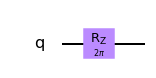

In [68]:
circ = QuantumCircuit(1)
circ.rz(2 * np.pi, 0)
circ.draw("mpl")

In [69]:
psi_gpc = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_gpc>: {psi_gpc.data}")

|psi>: [0.9999+0.j 0.0109+0.j]
|psi_gpc>: [-0.9999-0.j -0.0109+0.j]


## Bell state change - 1

Input: Two entangled qubits in the Bell state $|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$.

Goal: Change the two qubit state to $|\phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$.

Solution: This can be done with the controlled-$Z$ or $CZ$ gate, which acts as identity on the target bit if the control bit is 0, and as the $Z$ gate on the target bit if the control bit is 1. We can also do this with just the $Z$ gate acting on either of the qubits. 

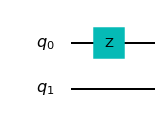

In [85]:
circ = QuantumCircuit(2)
circ.z(0)
circ.draw("mpl")

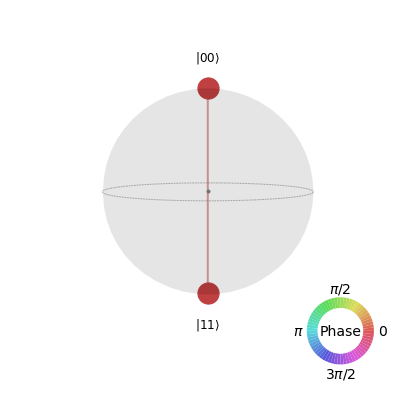

In [83]:
# Produce bell state |\phi^+>
bell_plus = QuantumCircuit(2)
bell_plus.h(0)
bell_plus.cx(0, 1)
display(bell_plus.draw("mpl"))

phi_zero = Statevector.from_label("00")
phi_plus = phi_zero.evolve(bell_plus)
plot_state_qsphere(phi_plus)

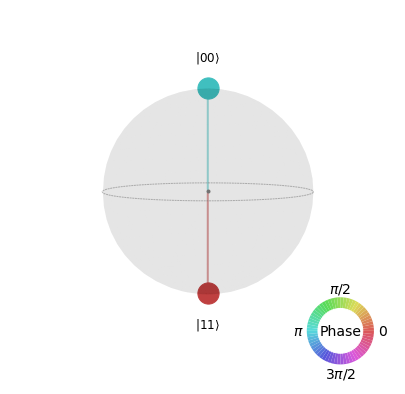

In [86]:
# change bell state |\phi^+> to |\phi^->
phi_minus = phi_plus.evolve(circ)
plot_state_qsphere(phi_minus)

## Bell state change - 2

Input: Two entangled qubits in the Bell state $|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$.

Goal: Change the two qubit state to $|\psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.

Solution: This will be possible with an $X$-gate applied to the least significant bit (or the zeroth bit).

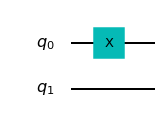

In [87]:
circ = QuantumCircuit(2)
circ.x(0)
circ.draw("mpl")

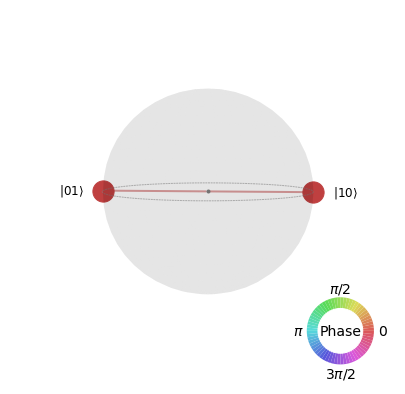

In [88]:
psi_plus = phi_plus.evolve(circ)
plot_state_qsphere(phi_plus)
plot_state_qsphere(psi_plus)